In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_categorical_dtype


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier

import statsmodels
import statsmodels.api as sm

In [2]:
plt.rcParams["figure.figsize"]=[15,8]

In [3]:
pd.options.display.max_columns=None

pd.options.display.max_rows=None

np.set_printoptions(suppress=True) # It will convert 10000000 as 10e5 so by suppress it wont convert. 
                                   # Suppress is to avoid converting into scientific value 

In [4]:
df_vaccine=pd.read_csv(r"Vaccine.csv")
df_vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
df_vaccine.shape

(26707, 34)

In [6]:
df_vaccine.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
for col in ['h1n1_worry','h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
            'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition','cont_child_undr_6_mnths',
           'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']:
    df_vaccine[col]=df_vaccine[col].astype("object")

In [8]:
df_vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
df_vaccine.dtypes

unique_id                     int64
h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [10]:
df_vaccine.drop("unique_id",axis=1,inplace=True)

In [11]:
df_vaccine.shape 

(26707, 33)

In [12]:
df_features=df_vaccine.iloc[:,df_vaccine.columns != "h1n1_vaccine"]

df_target=df_vaccine.iloc[:,df_vaccine.columns == "h1n1_vaccine"]

In [13]:
# df_features.describe() # As we dont have any numerical values it automatically generates categorical without specifying object
df_features.describe().T # T is transpose to read it easily

,count,unique,top,freq
h1n1_worry,26615.0,4.0,2.0,10575.0
h1n1_awareness,26591.0,3.0,1.0,14598.0
antiviral_medication,26636.0,2.0,0.0,25335.0
contact_avoidance,26499.0,2.0,1.0,19228.0
bought_face_mask,26688.0,2.0,0.0,24847.0
wash_hands_frequently,26665.0,2.0,1.0,22015.0
avoid_large_gatherings,26620.0,2.0,0.0,17073.0
reduced_outside_home_cont,26625.0,2.0,0.0,17644.0
avoid_touch_face,26579.0,2.0,1.0,18001.0
dr_recc_h1n1_vacc,24547.0,2.0,0.0,19139.0


In [14]:
df_vaccine.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


length of cat is  32


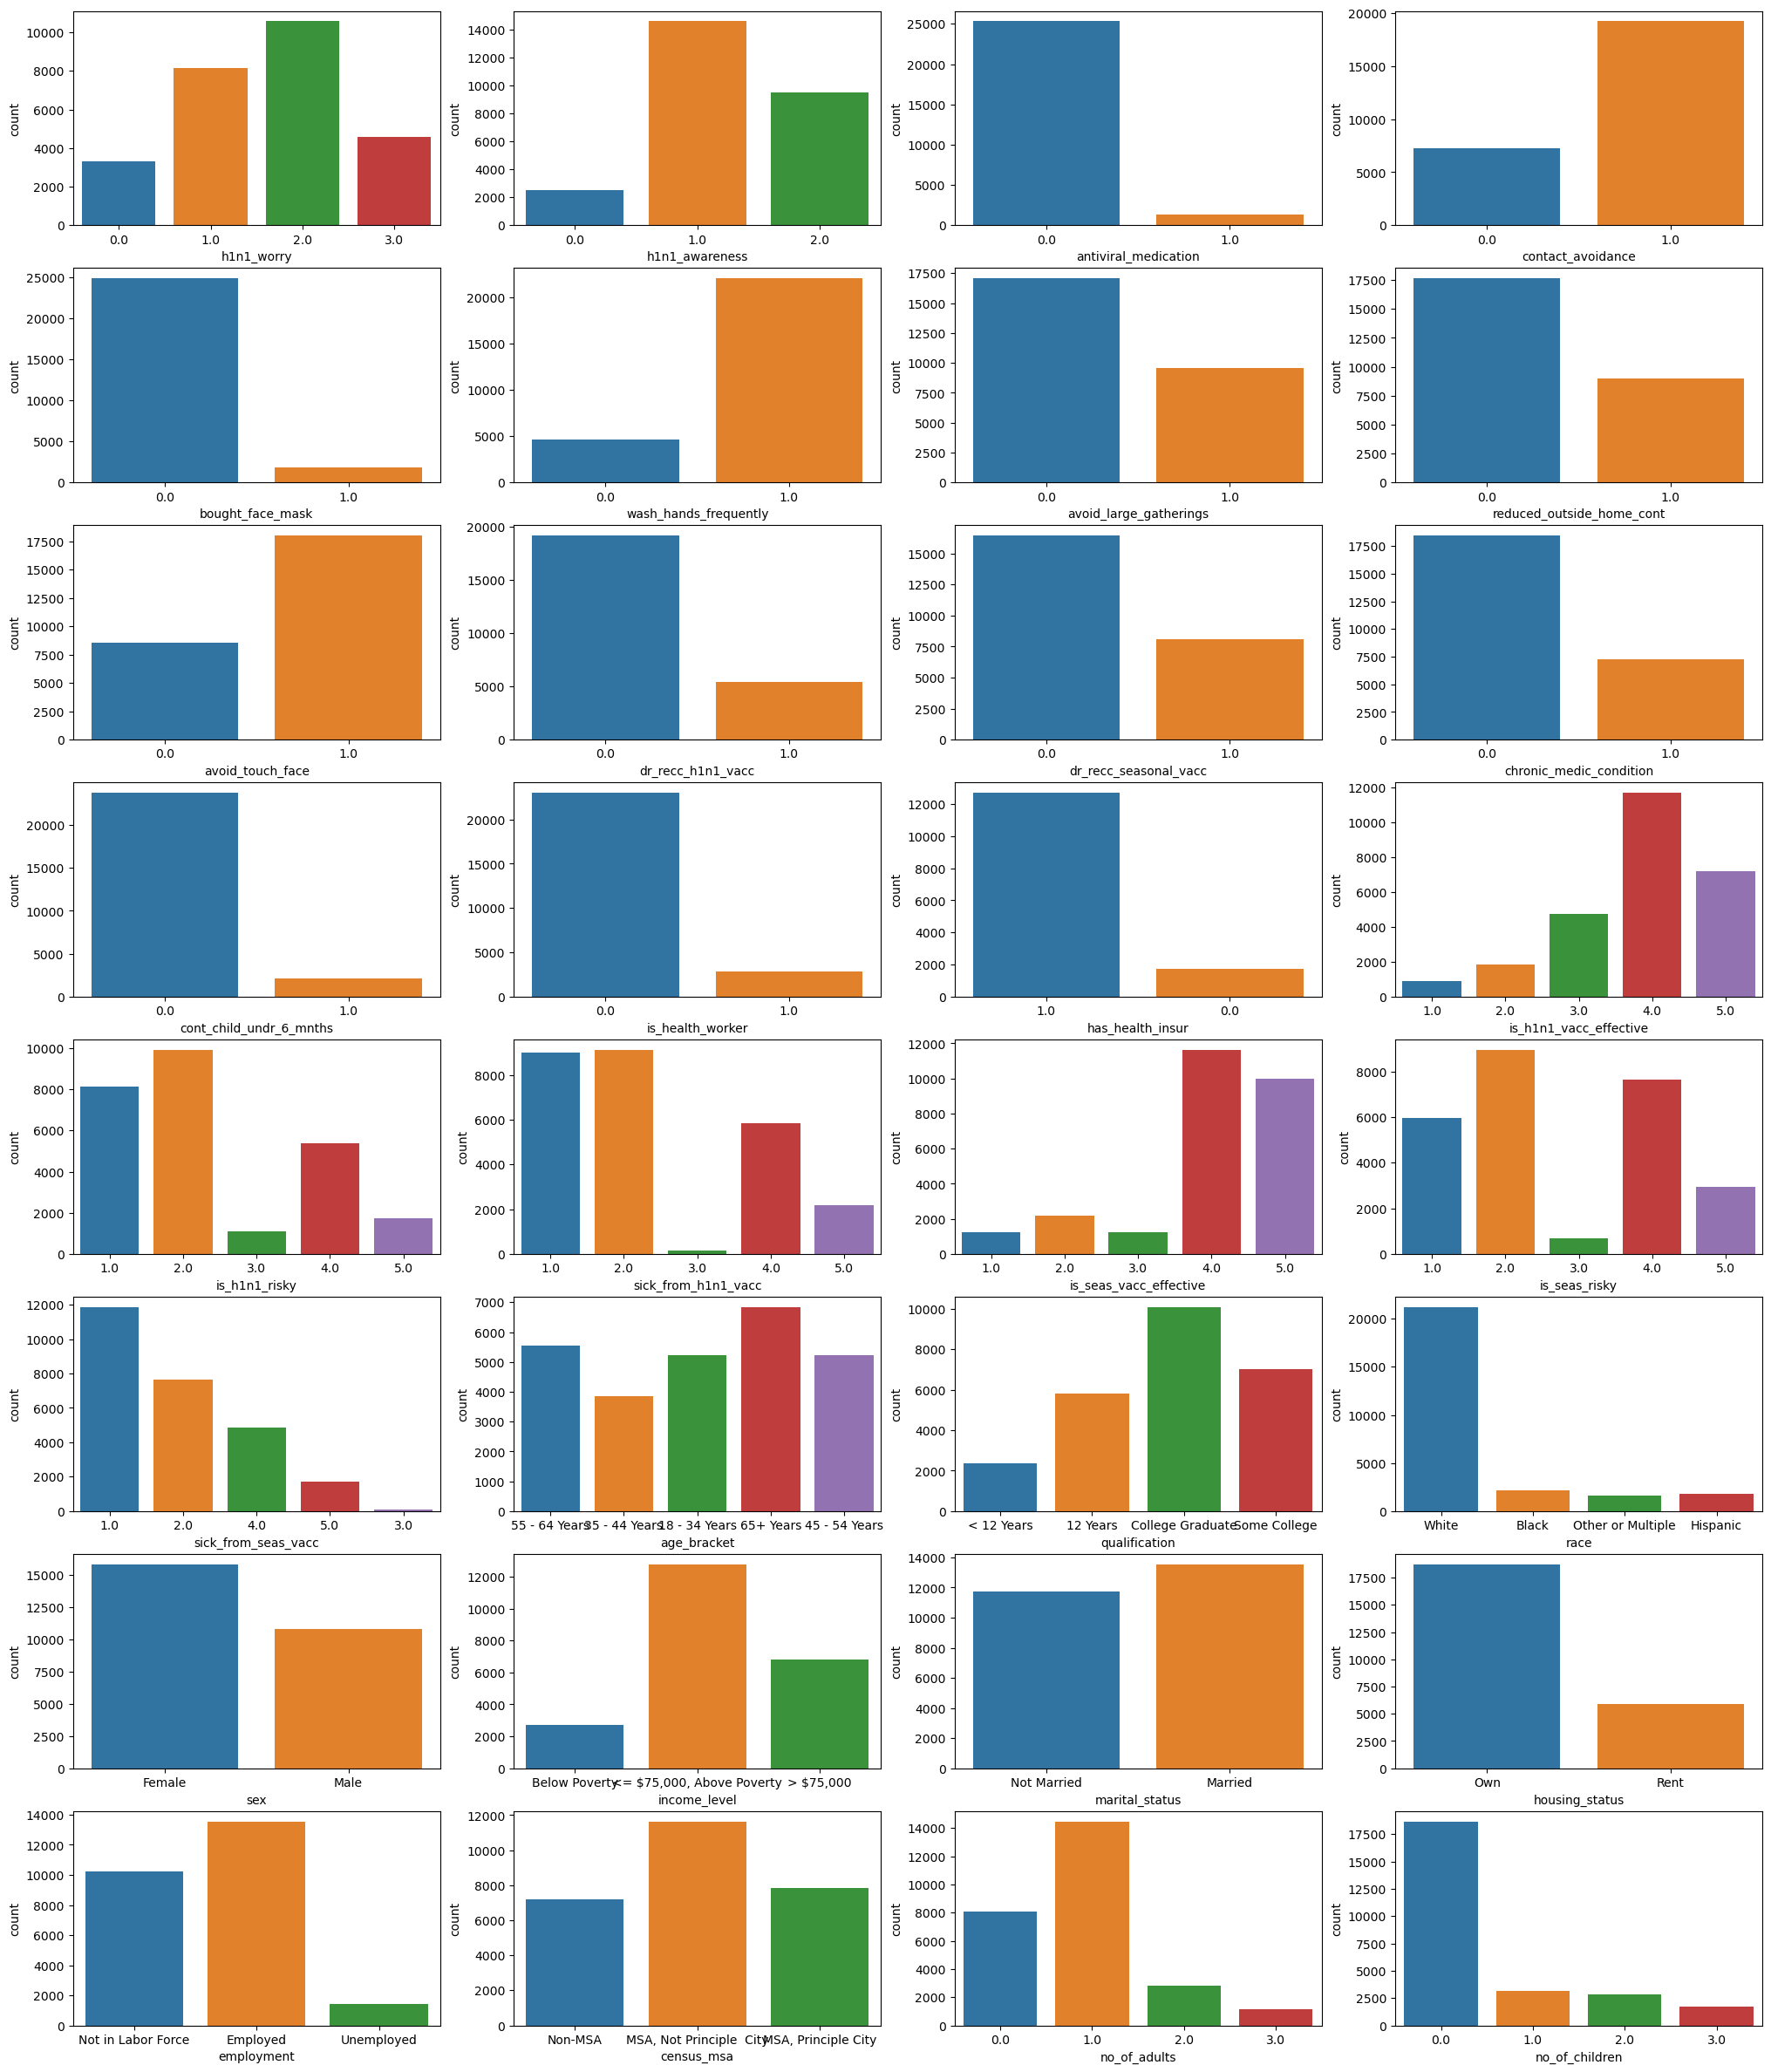

In [15]:
categorical=[]

for column in df_features:
    if df_features[column].dtype == "object":
        categorical.append(column)
        
print("length of cat is ", len(categorical))
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(25,30))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df_vaccine[variable], ax=subplot)
    
plt.show()

In [16]:
df_vaccine.dtypes

h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status               object
housing_status              

In [17]:
class_frequency = df_target.h1n1_vaccine.value_counts()
class_frequency

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

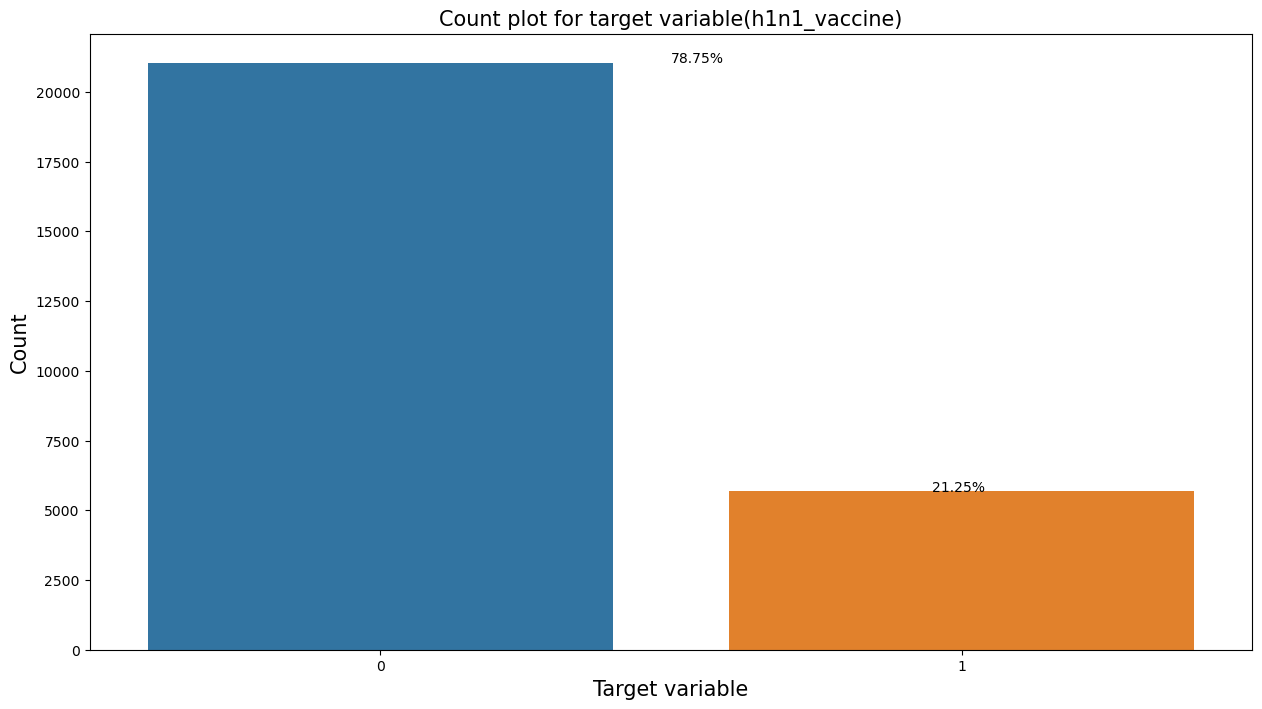

In [18]:
sns.countplot(x=df_target.h1n1_vaccine)

plt.text(x=0.5,y=df_target.h1n1_vaccine.value_counts()[0]+30,
        s=str(round((class_frequency[0])*100/len(df_target.h1n1_vaccine),2))+"%")
plt.text(x=0.95,y=df_target.h1n1_vaccine.value_counts()[1]+20,
        s=str(round((class_frequency[1])*100/len(df_target.h1n1_vaccine),2))+"%")

plt.title("Count plot for target variable(h1n1_vaccine)",fontsize=15)
plt.xlabel("Target variable",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

In [19]:
#Total=df_vaccine.isnull().sum() this is enough. the next one is just to beautify
Total=df_vaccine.isnull().sum().sort_values(ascending=False)

Percent=(df_vaccine.isnull().sum()*100/df_vaccine.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([Total,Percent],axis=1,keys=["Total","Percentage of missing values"])
missing_data

,Total,Percentage of missing values
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


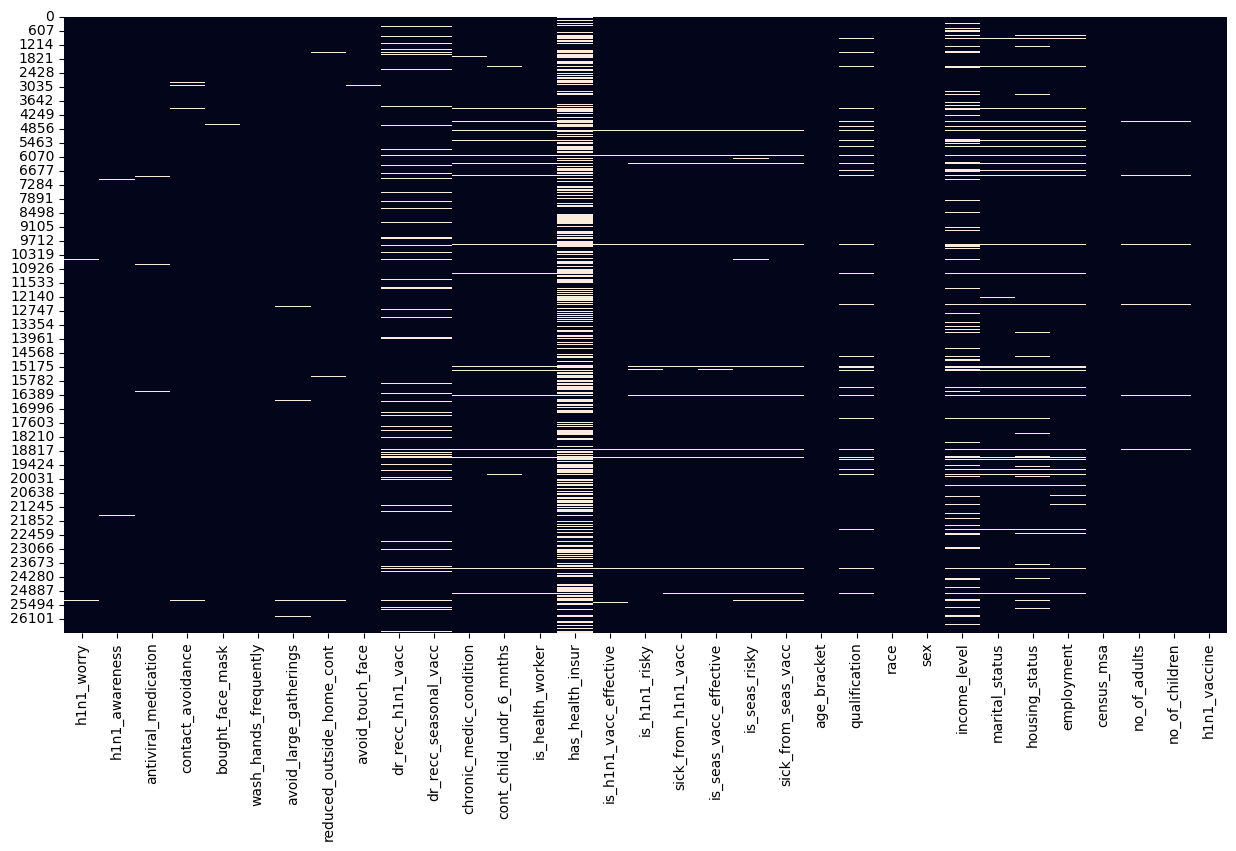

In [20]:
sns.heatmap(df_vaccine.isnull(),cbar=False)
plt.show()

In [21]:
df_vaccine.drop(["has_health_insur","income_level","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc"],
               axis=1, inplace=True) # This is used in every project for missing values

In [22]:
df_vaccine.shape

(26707, 29)

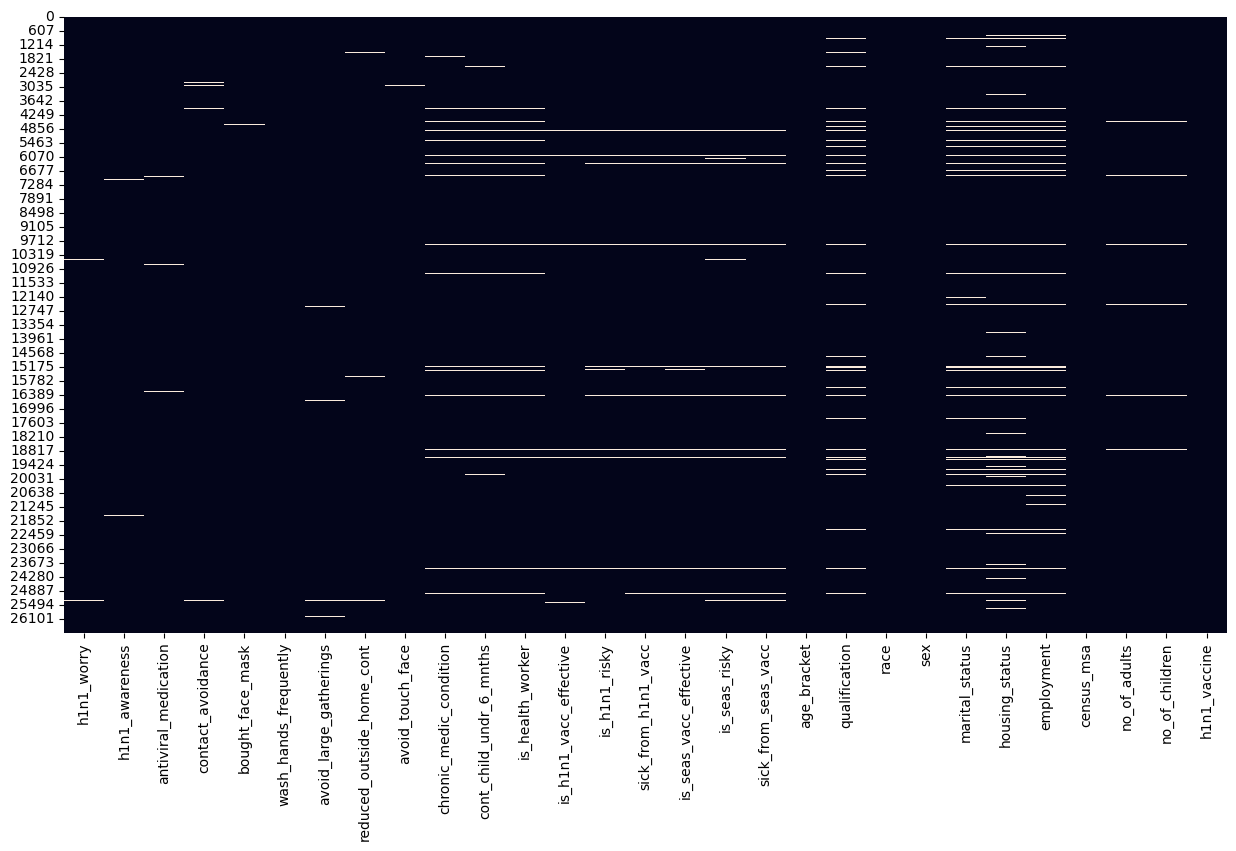

In [23]:
sns.heatmap(df_vaccine.isnull(),cbar=False)
plt.show()

In [24]:
df_vaccine.dropna(axis=0,inplace=True)

In [25]:
df_vaccine.shape

(23426, 29)

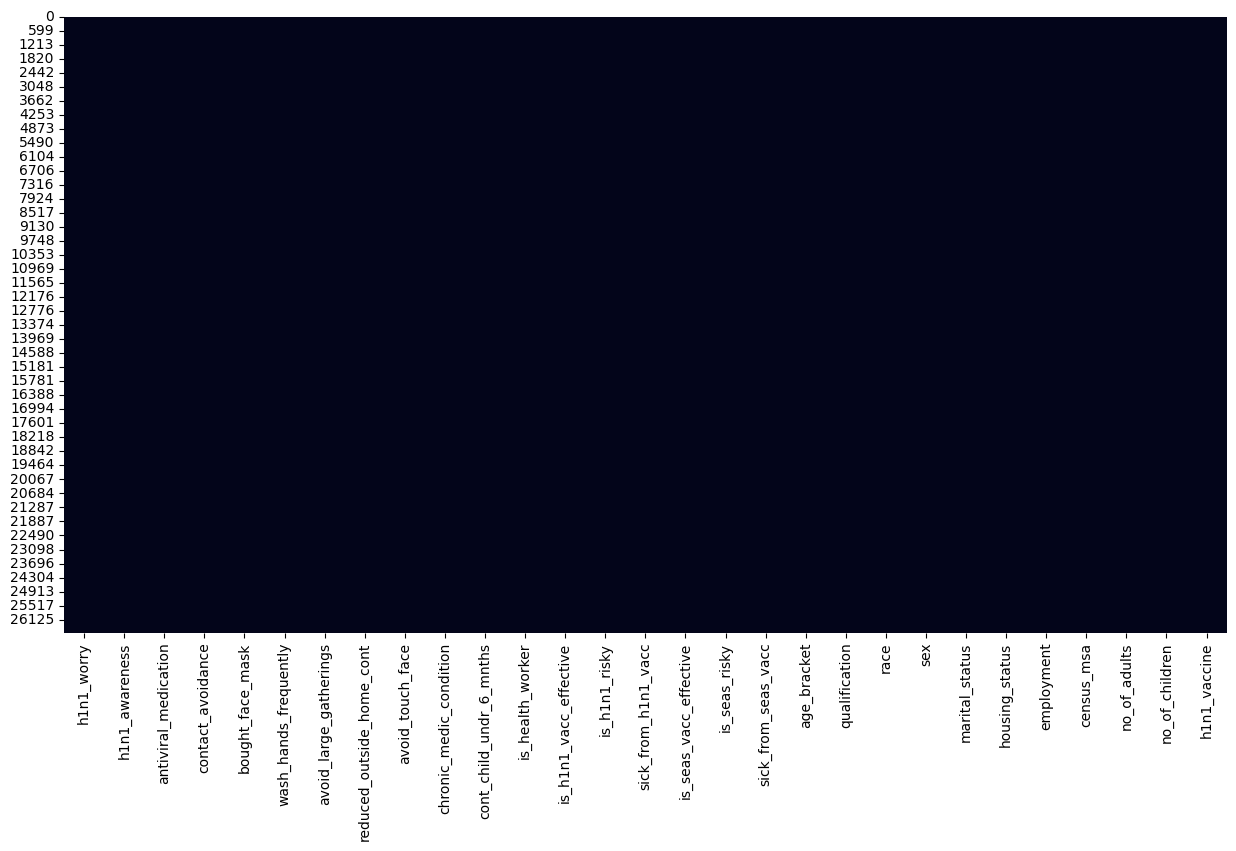

In [26]:
sns.heatmap(df_vaccine.isnull(),cbar=False)
plt.show()

In [27]:
df_vaccine.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [28]:
df_vaccine.dtypes

h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
marital_status               object
housing_status               object
employment                   object
census_msa                   object
no_of_adults                 object
no_of_children              

In [29]:
categorical=[]
for column in df_vaccine:
    categorical.append(column)

In [30]:
df_cat=df_vaccine[categorical]

df_num=df_vaccine.drop(categorical, axis=1)

In [31]:
df_cat.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [32]:
df_cat.shape

(23426, 29)

In [50]:
df_cat_dummies=pd.get_dummies(df_cat,drop_first=True,dtype=int)

In [51]:
df_cat_dummies.head()

,h1n1_vaccine,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
df_cat_dummies.shape

(23426, 63)

In [53]:
df_num=df_cat_dummies["h1n1_vaccine"]

In [54]:
df_cat=df_cat_dummies.drop("h1n1_vaccine",axis=1,inplace=True)

In [55]:
df_cat_dummies.shape

(23426, 62)

In [56]:
df_num.shape

(23426,)

In [57]:
y=pd.DataFrame(df_num)

In [58]:
X=pd.DataFrame(df_cat_dummies)

In [59]:
X.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [60]:
X.shape

(23426, 62)

In [61]:
y.shape

(23426, 1)

In [62]:
def get_test_report(model):
    return(classification_report(y_test,y_pred))

In [63]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

In [64]:
def plot_confusion_matrix(model):
   
    cm=confusion_matrix(y_test,y_pred)
    #Below codes all are just to beautify... above one is the main code for confusion matrix
    conf_matrix=pd.DataFrame(data=cm, columns=["Predicted 0","Predicted 1"], index=["Actual 0","Actual 1"])
    
    sns.heatmap(conf_matrix, annot=True,fmt="d", cmap=ListedColormap(["Lightskyblue"]),
               cbar=False, linewidths=0.1, annot_kws={"size":25})
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

In [65]:
def plot_roc(model):
    fpr, tpr, _ =roc_curve(y_test,y_pred_prob) #underscore is used when it is not much of use
    
    plt.plot(fpr,tpr)
    
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.plot([0,1],[0,1],"r--")
    
    plt.title("Roc Curve for h1n1_vaccine classifier", fontsize=15)
    plt.xlabel("False positivity rate (1-specificity)", fontsize=15)
    plt.ylabel("True positivity rate (sensitivity)", fontsize=15)
    
    plt.text(x=0.02, y=0.9, s=("AUC Score:",round(roc_auc_score(y_test,y_pred_prob),4)))
    
    plt.grid(True)

In [66]:
score_card=pd.DataFrame(columns=["Model","AUC Score","Precision Score","Recall Score","Accuracy Score",
                                "Kappa Score","F1 Score"])

def update_score_card(model_name):
    
    global score_card
    
    score_card = score_card._append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    
    return(score_card)

In [67]:
X=sm.add_constant(X)
X.head()

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,1.0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

print("X_train",X_train.shape)
print("y_train",y_train.shape)

print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (16398, 63)
y_train (16398, 1)
X_test (7028, 63)
y_test (7028, 1)


In [69]:
log_reg_model = sm.Logit(y_train, X_train).fit()

print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.414325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                16398
Model:                          Logit   Df Residuals:                    16335
Method:                           MLE   Df Model:                           62
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                  0.1990
Time:                        10:01:34   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -8482.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4648      0.297    -15.041     

In [70]:
y_pred_prob = log_reg_model.predict(X_test)

y_pred_prob.head()

9480     0.193582
25478    0.663039
16789    0.091390
8036     0.121057
7121     0.156698
dtype: float64

In [71]:
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [72]:
y_pred = np.array(y_pred, dtype=np.float32)

y_pred[0:5]

array([0., 1., 0., 0., 0.], dtype=float32)

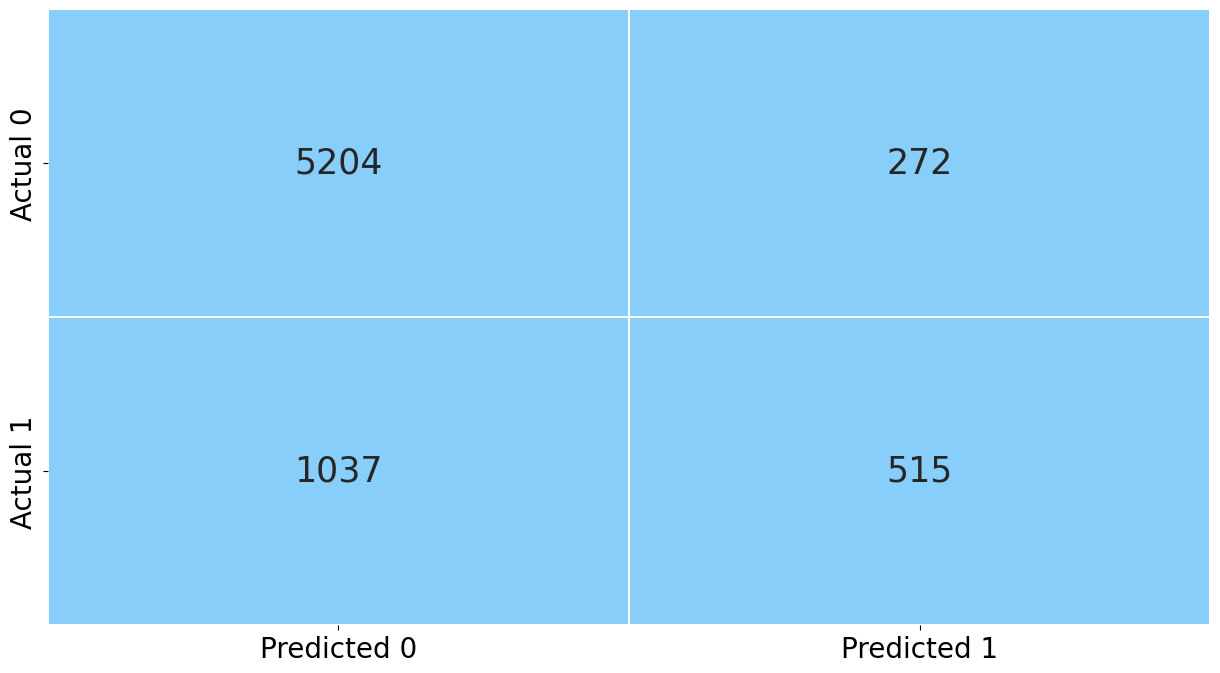

In [73]:
plot_confusion_matrix(log_reg_model)

In [74]:
test_report = get_test_report(log_reg_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5476
           1       0.65      0.33      0.44      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.64      0.66      7028
weighted avg       0.79      0.81      0.79      7028



In [75]:
kappa_value = kappa_score(log_reg_model)

print(kappa_value)

0.3426774787926872


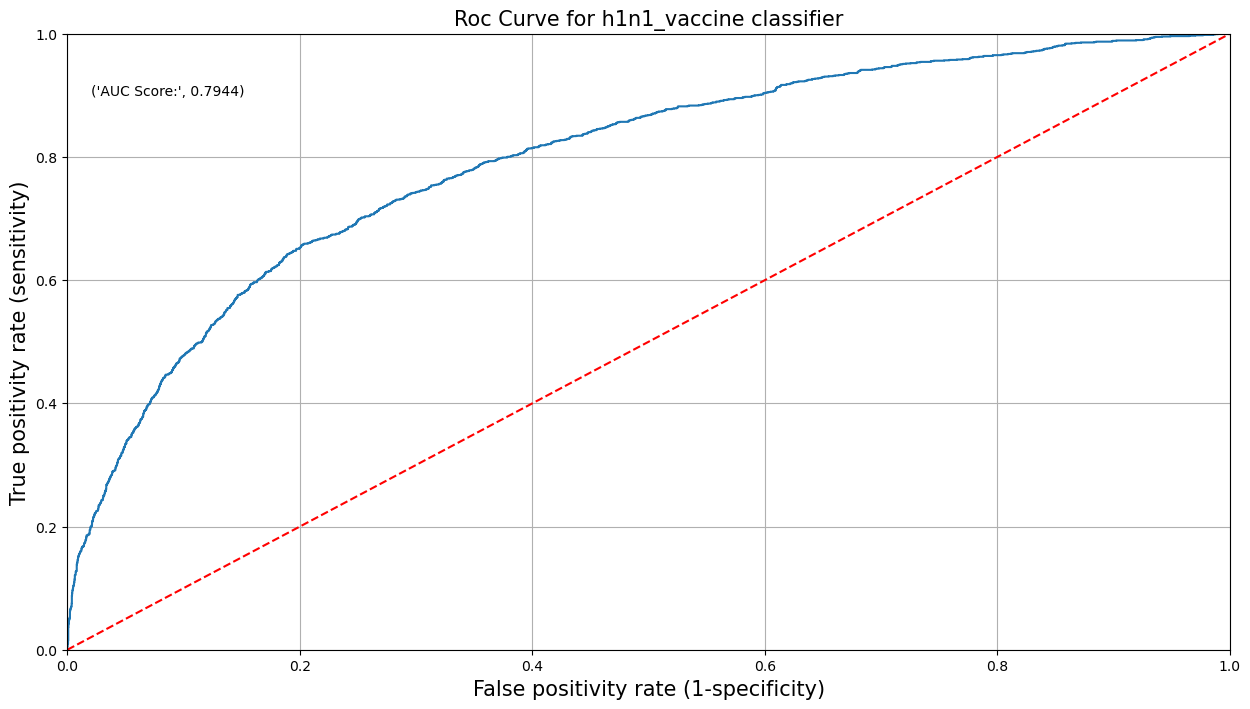

In [76]:
plot_roc(log_reg_model)

In [77]:
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,F1 Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.33183,0.813745,0.342677,NaN,0.440359


In [78]:
SGD = SGDClassifier(loss = 'log_loss', random_state = 10)

logreg_with_SGD = SGD.fit(X_train, y_train)

logreg_with_SGD 

SGDClassifier(loss='log_loss', random_state=10)

In [79]:
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]
y_pred_prob

array([0.14410053, 0.63480174, 0.09530489, ..., 0.51616051, 0.02412777,
       0.21511399])

In [80]:
y_pred = logreg_with_SGD.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

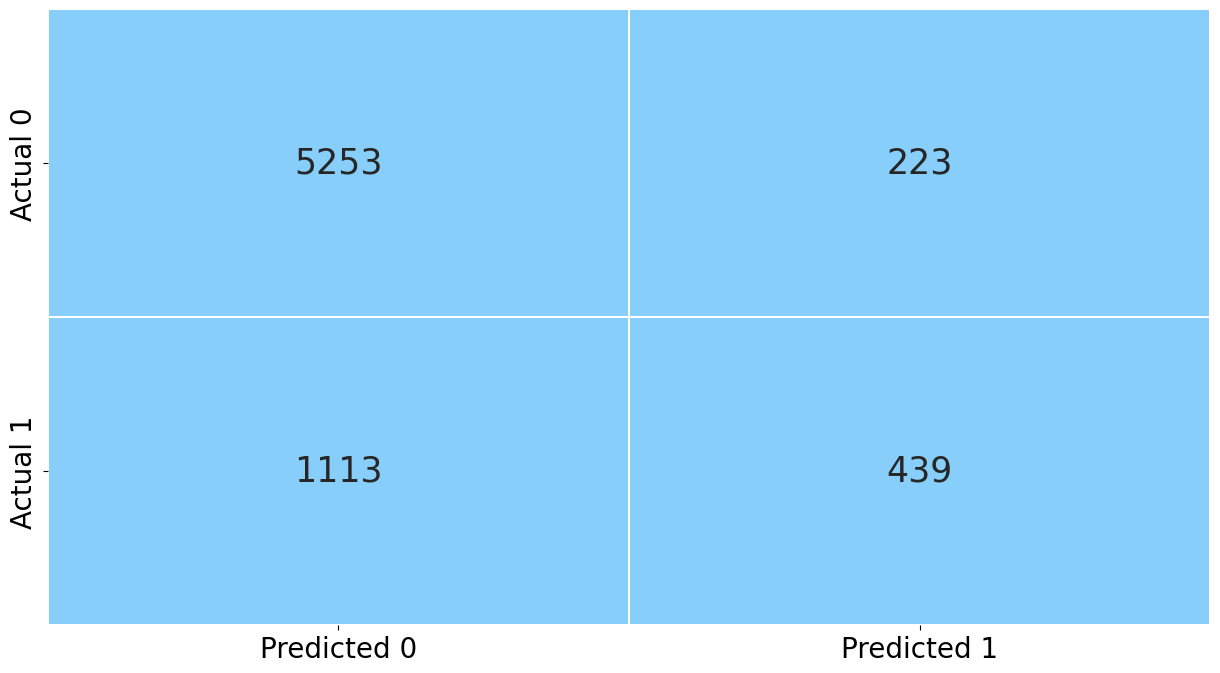

In [81]:
plot_confusion_matrix(logreg_with_SGD)

In [82]:
test_report = get_test_report(logreg_with_SGD)

print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5476
           1       0.66      0.28      0.40      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.62      0.64      7028
weighted avg       0.79      0.81      0.78      7028



In [83]:
kappa_value = kappa_score(logreg_with_SGD)

print(kappa_value)

0.30475321107275866


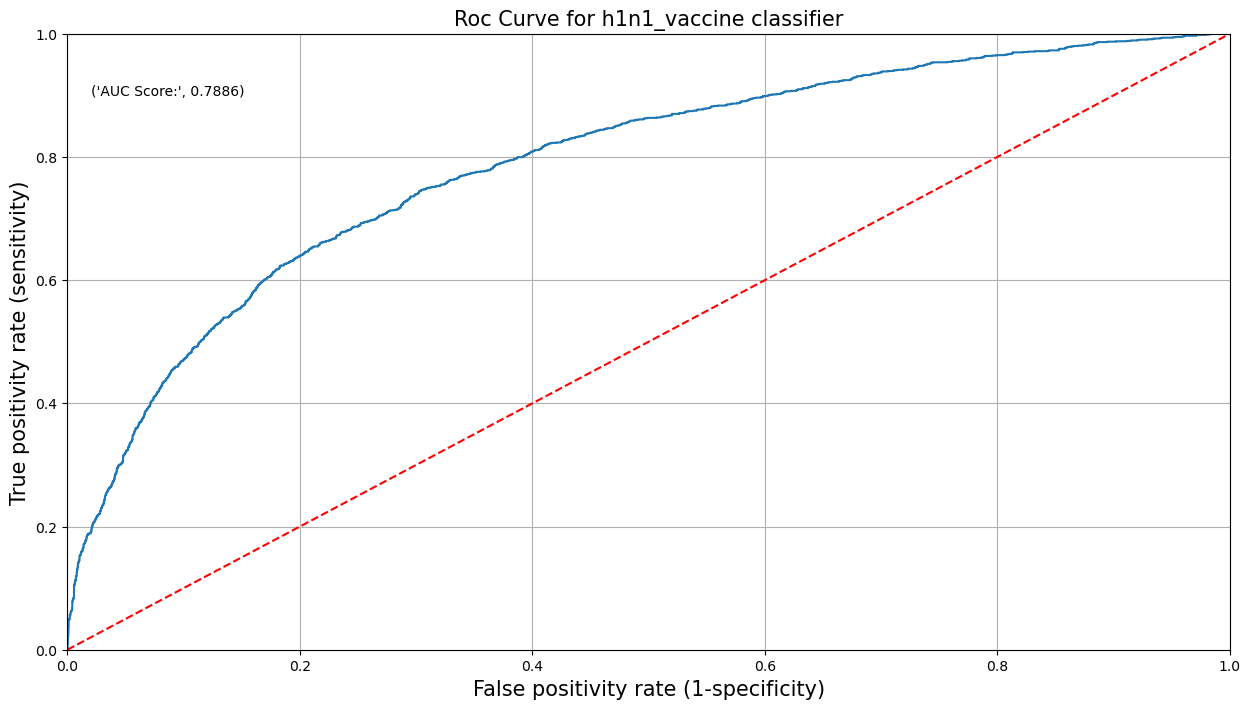

In [84]:
plot_roc(logreg_with_SGD)

In [85]:
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,F1 Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.331830,0.813745,0.342677,NaN,0.440359
1,Logistic Regression (SGD),0.788639,0.663142,0.282861,0.809903,0.304753,NaN,0.396567


In [86]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,F1 Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.331830,0.813745,0.342677,NaN,0.440359
1,Logistic Regression (SGD),0.788639,0.663142,0.282861,0.809903,0.304753,NaN,0.396567


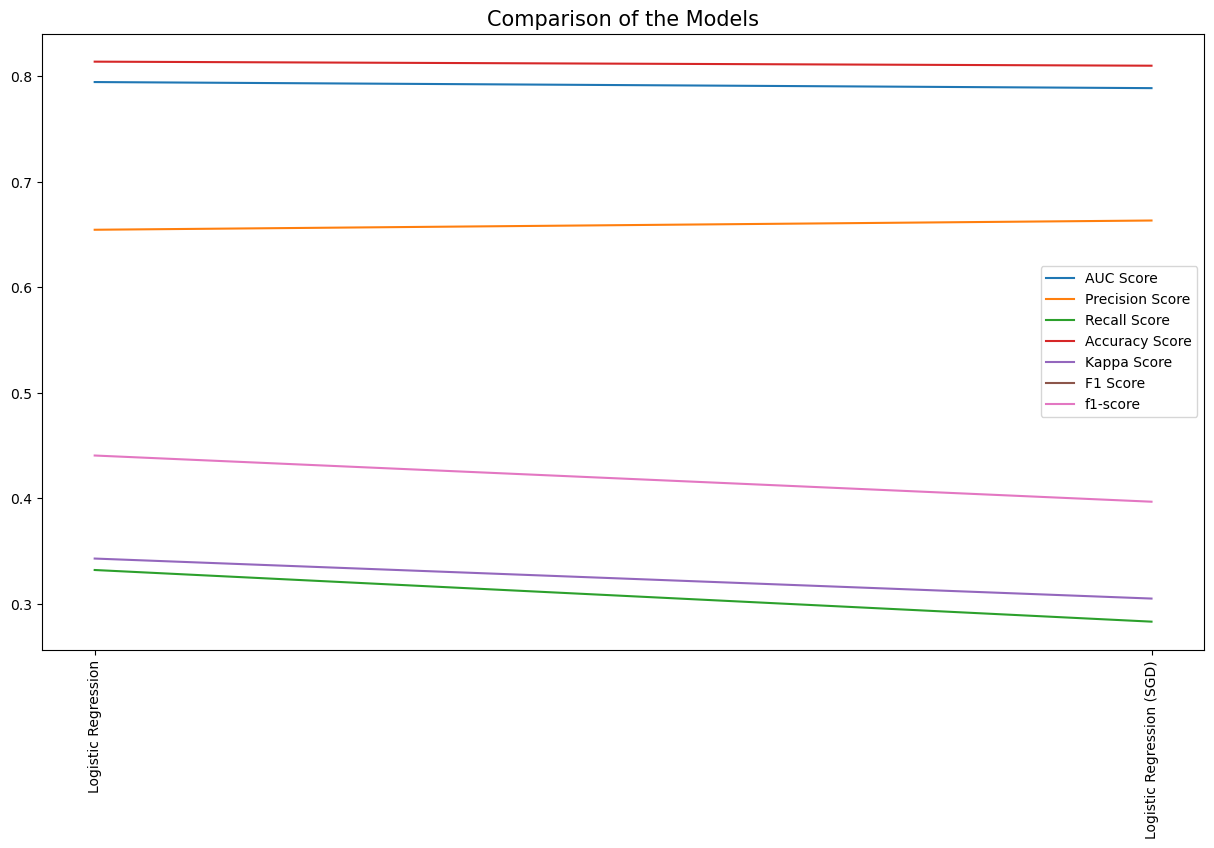

In [87]:
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()